In [3]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH +  "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH): 
       csv_path = os.path.join(housing_path, "housing.csv") 
       return pd.read_csv(csv_path) 

In [6]:
housing = load_housing_data()

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
%matplotlob inline 

UsageError: Line magic function `%matplotlob` not found.


In [12]:
%matplotlob inline 

UsageError: Line magic function `%matplotlob` not found.


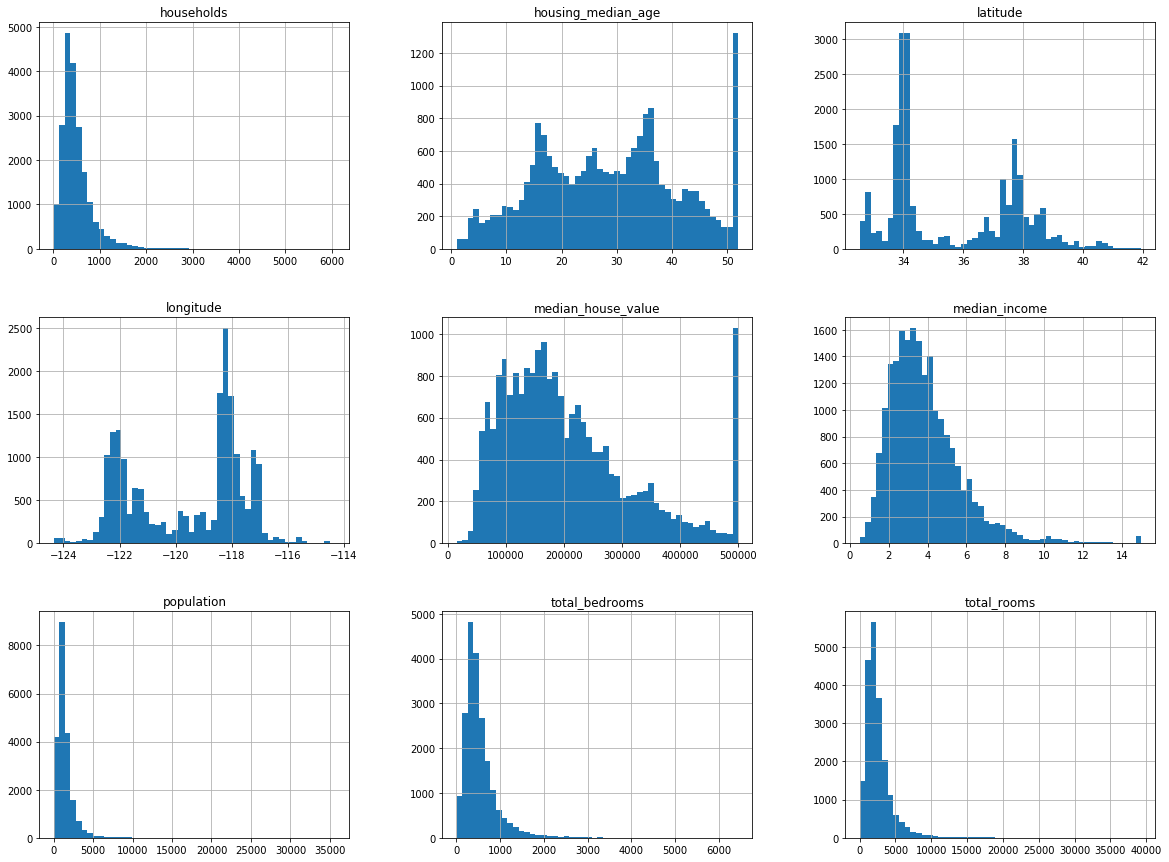

In [11]:
%matplotlib inline 

import matplotlib.pyplot as plt
housing.hist(bins=50,  figsize=(20,15))
plt.show()

In [12]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [13]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train + ", len(test_set), "test")

(16512, 'train + ', 4128, 'test')


In [14]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train + ", len(test_set), "test")

(16512, 'train + ', 4128, 'test')


In [15]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train + ", len(test_set), "test")

(16512, 'train + ', 4128, 'test')


In [21]:
import hashlib

In [17]:
import hashlib

 def test_set_check(identifier, test_ratio, hash):
        return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
    
 def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_checked(id_, test_ratio, hash))

IndentationError: unexpected indent (<ipython-input-17-218f797bf964>, line 3)

In [18]:
import hashlib


def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio


def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:  test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [19]:
housing_with_id = housing.reset_index() # adds an index column 
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [20]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [21]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [33]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

NameError: name 'strat_train_set' is not defined

In [22]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1/5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0 , inplace=True)

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,  random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [24]:
housing["income_cat"].value_counts() / len(housing)

1.0    0.782510
2.0    0.202568
3.0    0.012548
4.0    0.002374
Name: income_cat, dtype: float64

In [25]:
for set in (strat_test_set, strat_train_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [26]:
housing = strat_train_set.copy()

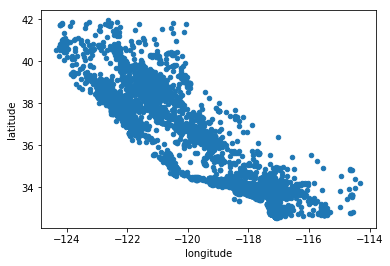

In [27]:
housing.plot(kind = "scatter",  x="longitude", y="latitude")

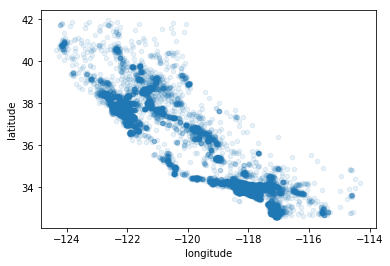

In [28]:
housing.plot(kind = "scatter", x="longitude",y="latitude", alpha = 0.1)

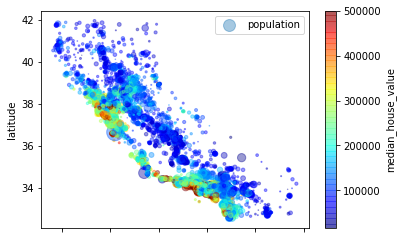

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.4,
             s=housing["population"]/100, label="population",
             c="median_house_value",cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [30]:
corr_matrix = housing.corr()

In [31]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.685253
total_rooms           0.133185
housing_median_age    0.110266
households            0.066524
total_bedrooms        0.049321
population           -0.024937
longitude            -0.049931
latitude             -0.141356
Name: median_house_value, dtype: float64

/Applications/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119a97910>,
      dtype=object)

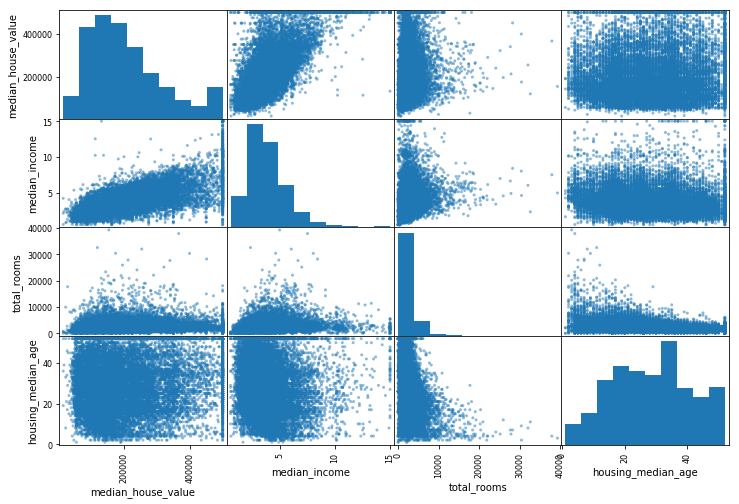

In [48]:
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

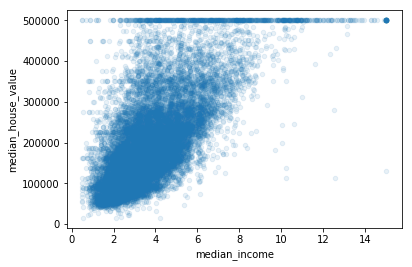

In [32]:
housing.plot(kind = "scatter", x="median_income", y="median_house_value", alpha=0.1)

In [33]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedroom_per_room"]=housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"]=housing["population"] / housing["households"]

In [34]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False) 

median_house_value          1.000000
median_income               0.685253
rooms_per_household         0.168874
total_rooms                 0.133185
housing_median_age          0.110266
households                  0.066524
total_bedrooms              0.049321
population_per_household   -0.022002
population                 -0.024937
longitude                  -0.049931
latitude                   -0.141356
bedroom_per_room           -0.250880
Name: median_house_value, dtype: float64

In [35]:
housing = strat_train_set.drop("median_house_value", axis =1)
housing_labels = strat_train_set["median_house_value"].copy()

In [36]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = "median")

In [37]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [38]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [39]:
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2123.    ,  434.    , 1162.    ,
        409.    ,    3.5388])

In [40]:
X = imputer.transform(housing_num)

In [41]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [42]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat=housing["ocean_proximity"]
housing_cat_encoded=encoder.fit_transform(housing_cat)

In [43]:
housing_cat_encoded

array([4, 3, 0, ..., 0, 0, 4])

In [44]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [45]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<type 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [46]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [47]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)

In [48]:
housing_cat_1hot

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', Imputer(strategy="median")),
                        ('attribs_adder', CombinedAttributesAdder()),
                        'std_scaler', StandardScaler()),])

SyntaxError: invalid syntax (<ipython-input-49-305415bb6835>, line 6)

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', Imputer(strategy="median")),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler()),
                        ])

housing

NameError: name 'CombinedAttributesAdder' is not defined

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
    
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit(self, X, y=None):
        return self # nothing else to do 
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix] 
        population_per_household = X[:, population_ix] / X[:, household_ix] 
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]

            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                        ('imputer', Imputer(strategy="median")),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_trasform(housing_num)

AttributeError: 'Pipeline' object has no attribute 'fit_trasform'

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                        ('imputer', Imputer(strategy="median")),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_trasform(housing_num)

AttributeError: 'Pipeline' object has no attribute 'fit_trasform'

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
            ('imputer', Imputer(strategy="median")),
            ('attribs_adder', CombinedAttributesAdder()),
            ('std_scaler', StandardScaler()),
        ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

NameError: name 'Imputer' is not defined

In [102]:
from sklearn.pipeline import FeatureUnion 

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]


num_pipeline = Pipeline([
             ('selector', DataFrameSelector(num_attribs)),
             ('imputer', Imputer(strategy="median")),
             ('attribs_adder', CombinedAttributesAdder()),
             ('std_scaler', StandardScaler()),
])


cat_pipeline = Pipeline([
             ('selector', DataFrameSelector(cat_attribs)),
             ('label_binarizer', LabelBinarizer()),
])

full_pipeline = FeatureUnion(transformer_list=[
             ("num_pipeline", num_pipeline),
             ("cat_pipeline", cat_pipeline),
])

housing_prepared = full_pipeline.fit_transform(housing)

NameError: name 'DataFrameSelector' is not defined

In [101]:
housing_prepared = full_pipeline.fit_transform(housing)

NameError: name 'full_pipeline' is not defined